In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym

import scipy.linalg

import matplotlib.gridspec as gridspec

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size': 14})


In [ ]:
A = np.random.randn(4,4)
B = np.random.randn(4,4)

# X 구하기
X1 = np.linalg.inv(A) @ B
X2 = B @ np.linalg.inv(A)

# 잔차
res1 = A@X1 - B # A@A^{-1}B = B - B = 0
res2 = A@X2 - B # A^{-1}B@A = A^{-1}B@A = 0 이 되어야 함

print(res1) # 영행렬
print()
print(res2) # 영행렬이 아님(행렬의 곱셈에서는 교환법칙이 성립하지 않음)

[[ 1.18655086e-15  0.00000000e+00 -1.11022302e-16 -9.99200722e-16]
 [ 2.22044605e-16  2.77555756e-16 -1.11022302e-16  8.88178420e-16]
 [-9.99200722e-16 -1.66533454e-16  1.11022302e-16  1.08246745e-15]
 [-2.77555756e-16  6.66133815e-16  5.55111512e-16  6.66133815e-16]]

[[-0.98562046  2.37029383  1.52403478  1.80159657]
 [-2.10318155  3.69650298  2.681626   -0.54392048]
 [ 6.86169528 -5.31302298 -4.75081156 -0.09317026]
 [ 4.55979188 -2.93271688 -2.00620995  2.03992904]]


## RREF(Reduced Row Echelon Form, 기약행 사다리꼴)

In [6]:
import sympy as sym

M = np.array([[1,1,4], [-1/2, 1, 2]])

symMat = sym.Matrix(M)

# RREF
symMat.rref()[0]

Matrix([
[1, 0, 1.33333333333333],
[0, 1, 2.66666666666667]])

## LU 분해

In [7]:
A = np.array([[2,2,4], [1,0,3], [2,1,2]])

_, L, U = scipy.linalg.lu(A)

print('L: ')
print(L), print(' ')
print('U: ')
print(U), print(' ')

print('A - LU : ')
print(A - L@U) 


L: 
[[1.  0.  0. ]
 [0.5 1.  0. ]
 [1.  1.  1. ]]
 
U: 
[[ 2.  2.  4.]
 [ 0. -1.  1.]
 [ 0.  0. -3.]]
 
A - LU : 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


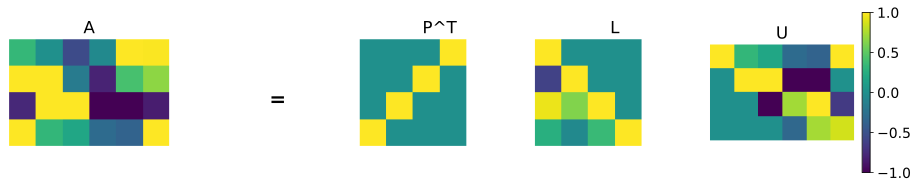

In [ ]:
m = 4
n = 6

A = np.random.randn(m,n)

P, L, U = scipy.linalg.lu(A)

fig, axs = plt.subplots(1,5, figsize=(13,4))

axs[0].imshow(A, vmin=-1, vmax=1) #vmin, vmax : 컬러맵의 색상 범위 설정
axs[0].set_title('A')

axs[1].imshow(np.ones((m,n)), cmap='gray', vmin=-1, vmax=1)
axs[1].text(n/2,m/2, '=', ha='center', fontsize=20, fontweight='bold')

axs[2].imshow(P.T, vmin=-1, vmax=1)
axs[2].set_title(r'P^T')

axs[3].imshow(L, vmin=-1, vmax=1)
axs[3].set_title('L')

h = axs[4].imshow(U, vmin=-1, vmax=1)
axs[4].set_title('U')

for a in axs:
    a.axis('off')
    a.set_xlim([-.5, n-.5])
    a.set_ylim([m-.5, -.5])

fig.colorbar(h,ax=axs[-1], fraction=.05)
plt.tight_layout()
plt.savefig('Figure_09_01.png', dpi=300)
plt.show()

# Exercise 1

In [ ]:
import time

tic = time.time()

for i in range(1000):
    A = np.random.randn(100, 100)
    P, L, U = scipy.linalg.lu(A)

toc = time.time() - tic
toc #1000번의 LU 분해를 수행하는 데 걸린 총 시간(초) -> 총 실행 시간: 약 0.19초 (190밀리초)

0.19025707244873047

# Exercise 2

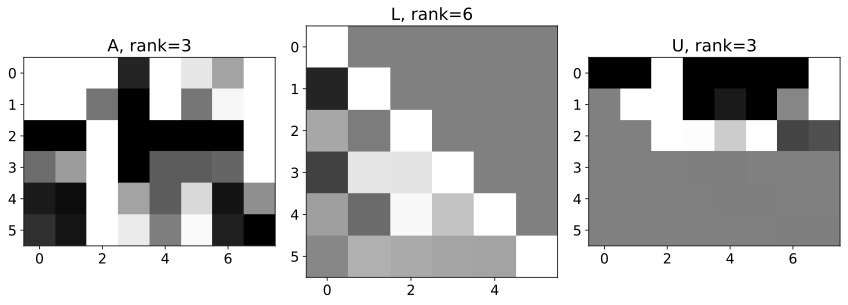

In [10]:
M = 6
N = 8
r = 3

A = np.random.randn(M, r) @ np.random.randn(r, N)

P, L, U = scipy.linalg.lu(A)

_, axs = plt.subplots(1,3, figsize=(12,7))

axs[0].imshow(A, vmin=-1, vmax=1, cmap='gray')
axs[0].set_title(f'A, rank={np.linalg.matrix_rank(A)}')

axs[1].imshow(L, vmin=-1, vmax=1, cmap='gray')
axs[1].set_title(f'L, rank={np.linalg.matrix_rank(L)}')

axs[2].imshow(U, vmin=-1, vmax=1, cmap='gray')
axs[2].set_title(f'U, rank={np.linalg.matrix_rank(U)}')

plt.tight_layout()
plt.savefig('Figure_09_02.png', dpi=300)
plt.show()


In [11]:
np.round(L, 2)

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.71,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.31, -0.03,  1.  ,  0.  ,  0.  ,  0.  ],
       [-0.49,  0.79,  0.78,  1.  ,  0.  ,  0.  ],
       [ 0.24, -0.16,  0.95,  0.53,  1.  ,  0.  ],
       [ 0.06,  0.38,  0.33,  0.29,  0.28,  1.  ]])

In [12]:
np.round(U, 2)

array([[-2.56, -2.81,  1.99, -2.59, -2.87, -2.07, -1.23,  2.46],
       [ 0.  ,  1.01,  1.31, -3.46, -0.79, -1.53,  0.05,  8.86],
       [ 0.  ,  0.  ,  2.26,  0.98,  0.6 ,  1.29, -0.46, -0.37],
       [ 0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  ]])

# Exercise 3

In [ ]:
M = 6
A = np.random.randn(M, M)  # 6×6 랜덤 행렬 생성

# LU 분해 수행
P, L, U = scipy.linalg.lu(A)

# LU 분해를 이용한 행렬식 계산
detLU = np.prod(np.diag(U)) * np.linalg.det(P)

# NumPy의 직접 행렬식 계산
detNP = np.linalg.det(A)

# 결과 비교
print(detLU, detNP)      # 두 방법의 결과 출력
print(detLU - detNP)      # 차이값 출력

# 결과 해석:
## detLU와 detNP는 거의 같은 값
## detLU - detNP는 매우 작은 값 (거의 0)

-4.698181833733503 -4.698181833733502
-8.881784197001252e-16


# Exercise 4

In [ ]:
m = 4
A = np.random.randn(m,m)

P, L, U = scipy.linalg.lu(A)

invViaLU = np.linalg.inv(U) @ np.linalg.inv(L) @ P.T

invViaInv = np.linalg.inv(A)

np.round(A@invViaLU, 10)

array([[ 1.,  0., -0., -0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

# Exercise 5

In [ ]:
A = np.random.randn(4,4)  # 4×4 랜덤 행렬 생성

P, L, U = scipy.linalg.lu(A)  # LU 분해: A = P × L × U

# LU 분해를 이용한 A^T A 계산
AtA_lu = U.T @ L.T @ L @ U

# 직접 A^T A 계산
AtA_direct = A.T @ A

# 두 결과의 차이를 10자리까지 반올림하여 출력
np.round(AtA_lu - AtA_direct, 10)

array([[-0., -0.,  0.,  0.],
       [ 0., -0.,  0.,  0.],
       [ 0.,  0., -0., -0.],
       [ 0.,  0., -0., -0.]])